# Projeto End-to End (housing)

**OBS:** Enviar as respostas para as questões usando um arquivo nomedo com seu nome na extensão .html., por exemplo, exemplo: nicksson.html.

Como salva um arquivo HTML do notebook?
1. Clica em File
2. Clica na opção Donwload as
3. Seleciona a opção .HTML

# Exercise solutions

### 1. Question: 
Implemente um Support Vector Machine para regressão (`sklearn.svm.SVR`), com vários hiperparâmetros, tais como `kernel="linear"` (variando valores para o hiperparâmetro `C`) ou `kernel="rbf"` (variando valores de hiperparâmetros `C` e `gamma`). Qual o SVM com melhor performance? Explique por que existe essa diferença de performance?

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

*Gerando o dataset*

In [2]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

*Inserindo parametros e modelos*

In [3]:
svr_rbf = SVR(kernel="rbf", epsilon=0.1)
svr_lin = SVR(kernel="linear")

*Parametros gridsearch*

In [4]:
param_grid = [
    {
        'C': [100, 200, 300], 
        'gamma': ['scale','auto']
    },
  ]

*Aplicando modelo GridSearch*

In [5]:
grid_search = GridSearchCV(svr_rbf, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [100, 200, 300], 'gamma': ['scale', 'auto']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [6]:
grid_search.best_params_

{'C': 200, 'gamma': 'scale'}

In [7]:
grid_search.best_estimator_

SVR(C=200)

In [8]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5366935034598019 {'C': 100, 'gamma': 'scale'}
0.5390718268252745 {'C': 100, 'gamma': 'auto'}
0.5001576557263295 {'C': 200, 'gamma': 'scale'}
0.5644634605769674 {'C': 200, 'gamma': 'auto'}
0.5130552585404112 {'C': 300, 'gamma': 'scale'}
0.6852576840062479 {'C': 300, 'gamma': 'auto'}


In [9]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000199,0.000398,0.000198,0.000397,100,scale,"{'C': 100, 'gamma': 'scale'}",-0.668820,-0.294356,-0.081690,...,-0.288040,0.207373,3,-0.148662,-0.087307,-0.140280,-0.109095,-0.149074,-0.126884,0.024613
1,0.000998,0.000006,0.000000,0.000000,100,auto,"{'C': 100, 'gamma': 'auto'}",-0.269183,-0.390338,-0.459704,...,-0.290598,0.134787,4,-0.145218,-0.084181,-0.124218,-0.093830,-0.145076,-0.118505,0.025453
2,0.000598,0.000489,0.000400,0.000490,200,scale,"{'C': 200, 'gamma': 'scale'}",-0.508371,-0.289296,-0.083923,...,-0.250158,0.157141,1,-0.147875,-0.087139,-0.139624,-0.107198,-0.144992,-0.125366,0.024027
3,0.001395,0.000491,0.000201,0.000401,200,auto,"{'C': 200, 'gamma': 'auto'}",-0.107833,-0.401961,-0.672683,...,-0.318619,0.212652,5,-0.142287,-0.083098,-0.123673,-0.094933,-0.145661,-0.117930,0.025049
4,0.001196,0.000400,0.000000,0.000000,300,scale,"{'C': 300, 'gamma': 'scale'}",-0.371262,-0.288258,-0.089887,...,-0.263226,0.092928,2,-0.147059,-0.087118,-0.138912,-0.106706,-0.144202,-0.124799,0.023742
5,0.001396,0.001016,0.000398,0.000487,300,auto,"{'C': 300, 'gamma': 'auto'}",-0.097270,-0.389025,-1.322468,...,-0.469578,0.437305,6,-0.140392,-0.082863,-0.110871,-0.094713,-0.144811,-0.114730,0.024473


##### Resposta:
O Kernel Linear é mais simples. Apresenta boa performance em problemas com dados
linearmente separáveis. 

Em grande parte dos problemas de classificação, o Kernel RBF obtém um desempenho superior ao kernel Linear, e por ter um reduzido
número de parâmetros é tido como a primeira opção dentre os tipos de kernel.

Por tanto, a resposta é depende, O Kernel Linear lida melhor com problemas menos complexos e mais lineares enquanto o Kernel RBF é o oposto. 

### 2. Question
Modifique o `GridSearchCV` por `RandomizedSearchCV`. Explique em quais é preferível usar GridSearch ao invés de RandomizedSearch e em quais cenários é preferível usar RandomizedSearch?

In [10]:
param_distribs = {
        'C': randint(low=1, high=500),
        'gamma': ['auto'],
    }

In [11]:
rnd_search = RandomizedSearchCV(svr_rbf, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                random_state=42)

rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000196AF864070>,
                                        'gamma': ['auto']},
                   random_state=42, scoring='neg_mean_squared_error')

In [12]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5387202842543507 {'C': 103, 'gamma': 'auto'}
0.886054994542946 {'C': 436, 'gamma': 'auto'}
0.759407575484948 {'C': 349, 'gamma': 'auto'}
0.6471172783371685 {'C': 271, 'gamma': 'auto'}
0.5341226076953757 {'C': 107, 'gamma': 'auto'}
0.5510935899248387 {'C': 72, 'gamma': 'auto'}
0.5528797532262647 {'C': 189, 'gamma': 'auto'}
0.48826942500430265 {'C': 21, 'gamma': 'auto'}
0.5387202842543507 {'C': 103, 'gamma': 'auto'}
0.5365845358851659 {'C': 122, 'gamma': 'auto'}


In [13]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000826,0.000417,0.000199,0.000399,103,auto,"{'C': 103, 'gamma': 'auto'}",-0.259891,-0.392682,-0.462586,-0.272816,-0.063123,-0.290220,0.136385,4
1,0.001396,0.000797,0.000398,0.000488,436,auto,"{'C': 436, 'gamma': 'auto'}",-0.370188,-0.370804,-2.150481,-0.313538,-0.720457,-0.785093,0.697798,10
2,0.001395,0.000488,0.000000,0.000000,349,auto,"{'C': 349, 'gamma': 'auto'}",-0.135350,-0.387044,-1.678532,-0.312116,-0.370457,-0.576700,0.558092,9
3,0.001396,0.000797,0.000000,0.000000,271,auto,"{'C': 271, 'gamma': 'auto'}",-0.090407,-0.397557,-1.138807,-0.311247,-0.155786,-0.418761,0.376151,8
4,0.000598,0.000488,0.000199,0.000399,107,auto,"{'C': 107, 'gamma': 'auto'}",-0.249034,-0.396360,-0.441131,-0.276433,-0.063477,-0.285287,0.132073,2
5,0.000199,0.000399,0.000399,0.000488,72,auto,"{'C': 72, 'gamma': 'auto'}",-0.356479,-0.361846,-0.438280,-0.251302,-0.110614,-0.303704,0.113407,6
6,0.001097,0.000914,0.000199,0.000399,189,auto,"{'C': 189, 'gamma': 'auto'}",-0.114390,-0.400908,-0.603914,-0.314801,-0.094368,-0.305676,0.189388,7
7,0.000399,0.000488,0.000199,0.000399,21,auto,"{'C': 21, 'gamma': 'auto'}",-0.176822,-0.291638,-0.187460,-0.251129,-0.284986,-0.238407,0.048069,1
8,0.000399,0.000488,0.000199,0.000399,103,auto,"{'C': 103, 'gamma': 'auto'}",-0.259891,-0.392682,-0.462586,-0.272816,-0.063123,-0.290220,0.136385,4
9,0.000199,0.000399,0.000199,0.000398,122,auto,"{'C': 122, 'gamma': 'auto'}",-0.210838,-0.412394,-0.443827,-0.293326,-0.079230,-0.287923,0.133659,3


##### Resposta:
 O GridSearchCV faz todas as combinações possíveis dos parâmetros que lhes foram passados na hora de fazer o ajuste fino do modelo; enquanto a RandomizedSearchCV faz apenas uma quantidade específica e limitada de combinações aleatórias, e nós é que determinamos quantas iterações queremos que sejam feitas.

Ou seja, o Gridsearch tem um custo computacional maior e consequentemente leva mais tempo para ser executado, enquanto o Randomizedsearch tem um custo computacional bastante inferior e é relativamente mais rápido de ser executado. 

### 3. Question
Adicione um transformador para selecionar somente as features mais importantes.

In [14]:
## Disponível em: https://www.kaggle.com/camnugent/california-housing-prices?##select=housing.csv
df = pd.read_csv('housing.csv')

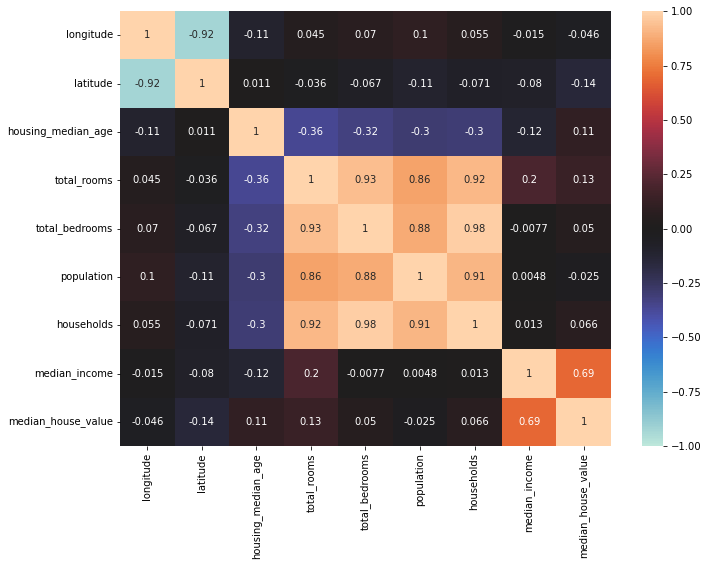

In [15]:
## Definindo tamanho da figura
rcParams['figure.figsize'] = 11, 8
## Matriz de correlação
matriz_de_correlacao = df.corr()
## Mapa de calor
sns.heatmap(matriz_de_correlacao, annot=True, vmin=-1, vmax=1, center=0)
## Definindo a posição dos ticks nos eixos
plt.yticks(rotation=360)
plt.xticks(rotation=90)
## Mostrando a figura
plt.show()

In [16]:
# Preenchendo valores faltantes com a mediana
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
## Separando entre previsores e target
Previsores = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
Target = df['median_house_value']

In [17]:
## Select K-Best
from sklearn.feature_selection import SelectKBest
## f_regression
from sklearn.feature_selection import f_regression
## Selecionando as três melhores features
Previsores_kbest = SelectKBest(f_regression, k=3).fit_transform(Previsores, Target)
print(Previsores_kbest)

[[3.7880e+01 8.8000e+02 8.3252e+00]
 [3.7860e+01 7.0990e+03 8.3014e+00]
 [3.7850e+01 1.4670e+03 7.2574e+00]
 ...
 [3.9430e+01 2.2540e+03 1.7000e+00]
 [3.9430e+01 1.8600e+03 1.8672e+00]
 [3.9370e+01 2.7850e+03 2.3886e+00]]


### 4. question
Tente criar um único pipeline que faça a preparação de dados completos mais a previsão final usando um outro algoritmo de machine learning não apresentado no tutorial.

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
#
# Encode the label using LabelEncoder
#
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
#
# Create training and test data
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)
#
# Create a pipeline and fit the model
#
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        RandomForestClassifier(criterion='gini', n_estimators=50, max_depth=5, random_state=1))
 
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.956


### 5. Question
Explore automaticamente alguma opção de preparação usando `GridSearchCV`.

In [19]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

In [20]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [21]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']